Upon working with the data, it is a difficult task to obtain highly accurate regression models due to the data containing categorical values in abundance, however using an encoder such as Label Encoder, and tree based learning methods such as DT or better suited RFR due to its averaging over conditions of encoded categorical data, is helpful in obtaining a generalized result over the trend observed using the Training data.

A feedforward neural network with 2 dense layers is also used for solving the regression problem, it did not help the case.

the test data contained a few outliers as well as negative cost values which did not make sense, they were not included in the training.

Coorelation between the values was also not observed as there were contradicting features with the target variable.

The data wasnt in time series, therefore Autoencoders or recurrent models cannot be used to predict the next timestep occurance.

The average absolute error observed for RFR and the NN are 29.53, and 29.24 respectively

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [25]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [8]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [5]:
train.head()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.1+ KB


In [27]:
train.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

only one row has columns where the value is NaN, we can just drop the row to handle the missing information

In [28]:
train.dropna(axis=0, inplace=True)

In [29]:
train.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [30]:
train.tail()

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04
550175,NTM1,X1,A3,DIRECT,Small,Powder,Nov-20,139.42


In [31]:
train.ProductType.unique()

array(['NTM3', 'NTM2', 'NTM1'], dtype=object)

#APPROACH USING Label Encoding and outlier removal, trained with ensemble learning (RF) and DNN on torch

Using Label Encoder to assign numerical values to columns

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()

In [33]:
categorical_cols.remove('Area Code')
categorical_cols.remove('Month of Sourcing')

In [34]:
for col in categorical_cols:
  train[col] = label_encoder.fit_transform(train[col])

In [35]:
train

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,2,0,A28,3,1,1,May-21,10.16
1,1,0,A9,0,1,1,Oct-20,134.28
2,2,1,A20,0,1,1,Dec-20,12.46
3,2,0,A18,3,2,1,Feb-21,107.22
4,1,0,A28,0,1,0,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,1,0,A5,0,1,1,Jul-20,136.47
550172,2,0,A14,0,1,0,Oct-20,72.56
550173,1,0,A5,0,2,1,Mar-21,147.64
550174,1,0,A7,0,2,1,Feb-21,150.04


In [36]:
for col in train.columns:
  print(train[col].unique())

[2 1 0]
[0 1 2]
['A28' 'A9' 'A20' 'A18' 'A10' 'A19' 'A29' 'A7' 'A2' 'A8' 'A4' 'A6' 'A30'
 'A35' 'A44' 'A45' 'A31' 'A25' 'A37' 'A32' 'A34' 'A46' 'A11' 'A39' 'A41'
 'A17' 'A38' 'A5' 'A22' 'A3' 'A12' 'A24' 'A36' 'A42' 'A14' 'A43' 'A33'
 'A15' 'A40' 'A21' 'A16' 'A13' 'A1' 'A23' 'A26']
[3 0 2 1]
[1 2 0]
[1 0]
['May-21' 'Oct-20' 'Dec-20' 'Feb-21' 'Nov-20' 'Sep-20' 'Mar-21' 'Jan-21'
 'Apr-21' 'Jul-20' 'Aug-20']
[1.016000e+01 1.342800e+02 1.246000e+01 ... 1.411072e+04 1.263047e+04
 3.705000e+03]


In [37]:
trainers = train.drop('Area Code', axis = 1)
trainers = trainers.drop('Month of Sourcing', axis = 1)

In [38]:
trainers

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,2,0,3,1,1,10.16
1,1,0,0,1,1,134.28
2,2,1,0,1,1,12.46
3,2,0,3,2,1,107.22
4,1,0,0,1,0,197.76
...,...,...,...,...,...,...
550171,1,0,0,1,1,136.47
550172,2,0,0,1,0,72.56
550173,1,0,0,2,1,147.64
550174,1,0,0,2,1,150.04


In [39]:
trainers.max(), trainers.mean(), trainers.min()

(ProductType             2.0
 Manufacturer            2.0
 Sourcing Channel        3.0
 Product Size            2.0
 Product Type            1.0
 Sourcing Cost       32632.5
 dtype: float64,
 ProductType           0.861143
 Manufacturer          0.254360
 Sourcing Channel      0.304364
 Product Size          1.393172
 Product Type          0.857168
 Sourcing Cost       108.817286
 dtype: float64,
 ProductType           0.00
 Manufacturer          0.00
 Sourcing Channel      0.00
 Product Size          0.00
 Product Type          0.00
 Sourcing Cost      -196.07
 dtype: float64)


 heavy outliers are present , including negative costs, to remove this



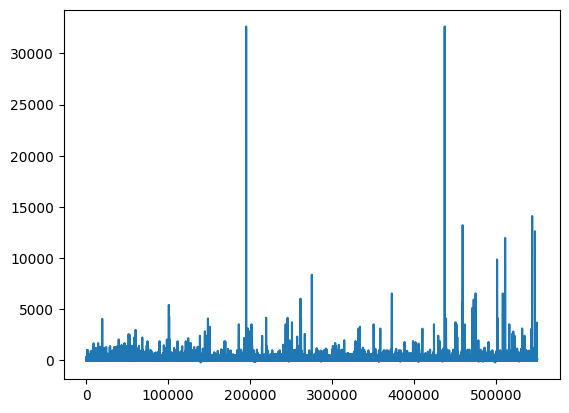

In [40]:
plt.plot(trainers['Sourcing Cost'])

In [41]:
num_less_than_zero = (trainers['Sourcing Cost'] < 0).sum()

print("Number of items less than 0 in the column:", num_less_than_zero)

Number of items less than 0 in the column: 184


In [42]:
num_less_than_one = (trainers['Sourcing Cost'] < 1).sum()

print("Number of items less than 1 in the column:", num_less_than_zero)

Number of items less than 1 in the column: 184


In [43]:
from scipy import stats
z_scores = np.abs(stats.zscore(trainers))
threshold = 4
# Find indices of outliers
outlier_indices = np.where(z_scores > threshold)
print("Original shape:", trainers.shape)
# Remove outliers
trainers = trainers[(z_scores < threshold).all(axis=1)]
print("Shape after removing outliers:", trainers.shape)

Original shape: (550176, 6)
Shape after removing outliers: (549262, 6)


In [44]:
num_less_than_one = (trainers['Sourcing Cost'] < 1).sum()
print("Number of items less than 1 in the column:", num_less_than_zero)

Number of items less than 1 in the column: 184


In [45]:
trainers = trainers[trainers['Sourcing Cost'] > 0]

In [46]:
num_less_than_one = (trainers['Sourcing Cost'] < 1).sum()

print("Number of items less than 1 in the column:", num_less_than_one)

Number of items less than 1 in the column: 3050


In [47]:
trainers = trainers[trainers['Sourcing Cost'] > 1]

In [48]:
trainers.describe()

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
count,530436.000000,530436.000000,530436.000000,530436.000000,530436.000000,530436.00000
mean,0.837519,0.252835,0.309606,1.393018,0.863344,110.98935
std,0.733498,0.474549,0.703904,0.503493,0.343484,55.28862
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.13000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,64.33000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,133.30000
75%,1.000000,0.000000,0.000000,2.000000,1.000000,146.70000
max,2.000000,2.000000,3.000000,2.000000,1.000000,525.83000


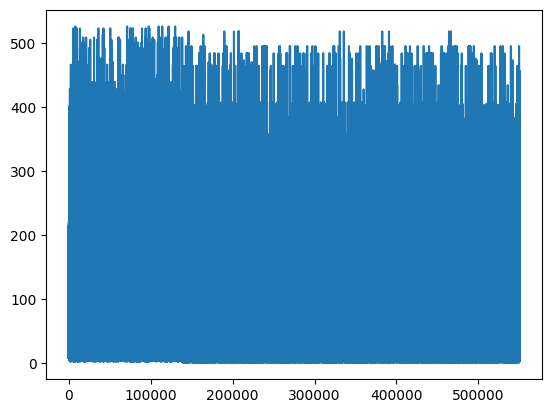

In [49]:
plt.plot(trainers['Sourcing Cost'])

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
trainers.columns

Index(['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size',
       'Product Type', 'Sourcing Cost'],
      dtype='object')

In [147]:
scaled_data= scaler.fit_transform(trainers)

In [148]:
scaled_data = pd.DataFrame(scaled_data, columns=trainers.columns)

In [149]:
scaled_data

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,1.584847,-0.532791,3.822105,-0.780584,0.397852,-1.823693
1,0.221516,-0.532791,-0.439841,-0.780584,0.397852,0.421256
2,1.584847,1.574473,-0.439841,-0.780584,0.397852,-1.782093
3,1.584847,-0.532791,3.822105,1.205543,0.397852,-0.068176
4,0.221516,-0.532791,-0.439841,-0.780584,-2.513498,1.569414
...,...,...,...,...,...,...
530431,0.221516,-0.532791,-0.439841,-0.780584,0.397852,0.460867
530432,1.584847,-0.532791,-0.439841,-0.780584,-2.513498,-0.695069
530433,0.221516,-0.532791,-0.439841,1.205543,0.397852,0.662897
530434,0.221516,-0.532791,-0.439841,1.205543,0.397852,0.706306


In [150]:
scaled_data['Sourcing Cost'].describe()

count    5.304360e+05
mean    -2.810901e-16
std      1.000001e+00
min     -1.987017e+00
25%     -8.439240e-01
50%      4.035310e-01
75%      6.458957e-01
max      7.503190e+00
Name: Sourcing Cost, dtype: float64

<Axes: >

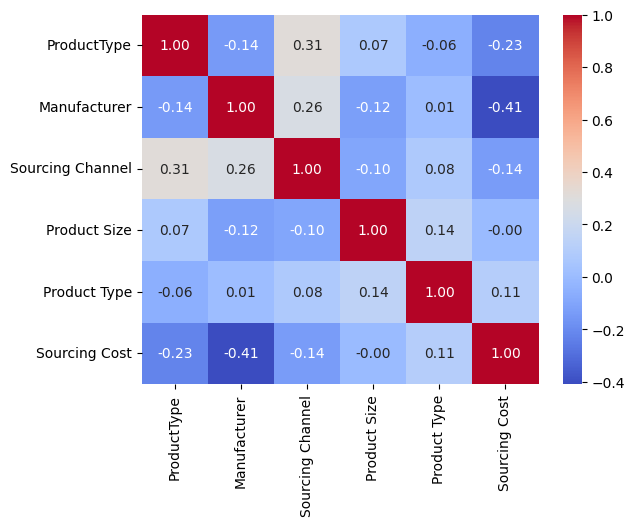

In [151]:
import seaborn as sns
corr_matrix = scaled_data.corr()

# Create heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

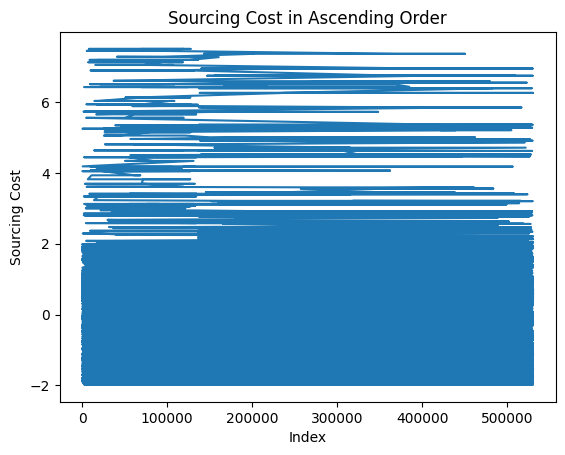

In [152]:
import matplotlib.pyplot as plt

sorted_data = scaled_data.sort_values(by='Sourcing Cost')
plt.plot(sorted_data['Sourcing Cost'])

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Sourcing Cost')
plt.title('Sourcing Cost in Ascending Order')
plt.show()


In [158]:
X = scaled_data.drop('Sourcing Cost', axis=1)  # Features
y = scaled_data['Sourcing Cost']               # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_regressor.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [60]:
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 0.4571662488003392
Mean Sq E: 0.5035004535918892
Root Mean Sq E: 0.7095776586053771
r2 score: 0.49734059194142166


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

class DNN(nn.Module):
    def __init__(self, input_dim):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [73]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

model = DNN(input_dim=X_train.shape[1]).to(device)


criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


num_epochs = 30
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move batch to GPU
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    model.eval()
    y_pred_tensor = model(X_test_tensor)
    test_loss = criterion(y_pred_tensor, y_test_tensor.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')

y_pred_nn = y_pred_tensor.cpu().numpy().flatten()


Epoch [1/30], Loss: 0.4835
Epoch [2/30], Loss: 0.2724
Epoch [3/30], Loss: 0.4760
Epoch [4/30], Loss: 0.3276
Epoch [5/30], Loss: 0.9264
Epoch [6/30], Loss: 0.4911
Epoch [7/30], Loss: 0.5866
Epoch [8/30], Loss: 0.5749
Epoch [9/30], Loss: 0.4380
Epoch [10/30], Loss: 0.6269
Epoch [11/30], Loss: 0.5359
Epoch [12/30], Loss: 0.5584
Epoch [13/30], Loss: 0.4226
Epoch [14/30], Loss: 0.4397
Epoch [15/30], Loss: 0.4426
Epoch [16/30], Loss: 0.5978
Epoch [17/30], Loss: 0.6089
Epoch [18/30], Loss: 0.3108
Epoch [19/30], Loss: 0.5474
Epoch [20/30], Loss: 0.3321
Epoch [21/30], Loss: 0.4690
Epoch [22/30], Loss: 0.3999
Epoch [23/30], Loss: 0.5347
Epoch [24/30], Loss: 0.5167
Epoch [25/30], Loss: 0.6126
Epoch [26/30], Loss: 1.0695
Epoch [27/30], Loss: 0.6418
Epoch [28/30], Loss: 0.3446
Epoch [29/30], Loss: 0.4931
Epoch [30/30], Loss: 0.5681
Test Loss: 0.5038


In [74]:
with torch.no_grad():
    model.eval()
    y_pred_tensor = model(X_test_tensor)
    test_loss = criterion(y_pred_tensor, y_test_tensor.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')

y_pred_nn = y_pred_tensor.cpu().numpy().flatten()

Test Loss: 0.5038


In [76]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_nn)
rmse = mean_squared_error(y_test, y_pred_nn, squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_nn)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_nn)
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 0.45583883485476173
Mean Sq E: 0.5037756361132164
Root Mean Sq E: 0.7097715379706462
r2 score: 0.49706586908409034


# Testing the model

## for quick execution and preparation of data, this function is used.

In [128]:
scaler1 = StandardScaler()
def prepare_scale(data):
  label_encoder = LabelEncoder()
  categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
  categorical_cols.remove('Area Code')
  categorical_cols.remove('Month of Sourcing')
  for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
  print("Original shape after label encoding:", data.shape)
  data = data.drop('Area Code', axis = 1)
  data = data.drop('Month of Sourcing', axis = 1)
  scaled_data= scaler1.fit_transform(data)
  scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
  return scaled_data


In [129]:
test = pd.read_csv('/content/test.csv')
scaled_test = prepare_scale(test)

Original shape after label encoding: (96, 8)


In [130]:
test_preds = rf_regressor.predict(scaled_test.drop('Sourcing Cost', axis = 1))
test_actual = scaled_test['Sourcing Cost']

In [131]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_actual, test_preds)
rmse = mean_squared_error(test_actual, test_preds, squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(test_actual, test_preds)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_actual, test_preds)
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 0.5614803112095098
Mean Sq E: 0.6109761540129964
Root Mean Sq E: 0.7816496363544196
r2 score: 0.38902384598700357


In [132]:
test_tensor_X = torch.tensor(scaled_test.drop('Sourcing Cost', axis = 1).values, dtype=torch.float32).to(device)
test_tensor_y = torch.tensor(scaled_test['Sourcing Cost'].values, dtype=torch.float32).to(device)

with torch.no_grad():
    model.eval()
    y_pred_tensor = model(test_tensor_X)
    test_loss = criterion(y_pred_tensor, test_tensor_y.unsqueeze(1))
    print(f'Test Loss: {test_loss.item():.4f}')

test_pred_nn = y_pred_tensor.cpu().numpy().flatten()

Test Loss: 0.6068


In [133]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_actual, test_pred_nn)
rmse = mean_squared_error(test_actual, test_pred_nn, squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(test_actual, test_pred_nn)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_actual, test_pred_nn)
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 0.56695748432836
Mean Sq E: 0.6067794065377187
Root Mean Sq E: 0.7789604653239589
r2 score: 0.39322059346228133


In [134]:
scaled_test['Sourcing Cost'] = test_preds
test_rfr = pd.DataFrame(scaler1.inverse_transform(scaled_test), columns = scaled_test.columns)

In [135]:
scaled_test['Sourcing Cost'] = test_pred_nn
test_nn = pd.DataFrame(scaler1.inverse_transform(scaled_test), columns = scaled_test.columns)

In [136]:
test_rfr

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,0.0,0.0,5.551115e-17,2.0,1.0,106.596121
1,0.0,0.0,5.551115e-17,1.0,1.0,138.224372
2,0.0,0.0,1.000000e+00,1.0,1.0,137.478968
3,0.0,0.0,5.551115e-17,1.0,1.0,138.224372
4,0.0,0.0,5.551115e-17,1.0,1.0,138.224372
...,...,...,...,...,...,...
91,2.0,0.0,5.551115e-17,2.0,0.0,65.338502
92,2.0,0.0,5.551115e-17,1.0,1.0,66.652552
93,2.0,0.0,5.551115e-17,2.0,1.0,55.679152
94,2.0,1.0,5.551115e-17,1.0,1.0,54.900011


In [137]:
test_nn

,ProductType,Manufacturer,Sourcing Channel,Product Size,Product Type,Sourcing Cost
0,0.0,0.0,5.551115e-17,2.0,1.0,106.521706
1,0.0,0.0,5.551115e-17,1.0,1.0,136.126474
2,0.0,0.0,1.000000e+00,1.0,1.0,138.366844
3,0.0,0.0,5.551115e-17,1.0,1.0,136.126474
4,0.0,0.0,5.551115e-17,1.0,1.0,136.126474
...,...,...,...,...,...,...
91,2.0,0.0,5.551115e-17,2.0,0.0,60.589067
92,2.0,0.0,5.551115e-17,1.0,1.0,63.786534
93,2.0,0.0,5.551115e-17,2.0,1.0,56.166258
94,2.0,1.0,5.551115e-17,1.0,1.0,48.365945


In [138]:
test['nn_results'] = test_nn['Sourcing Cost']
test['rfr_results'] = test_rfr['Sourcing Cost']

In [139]:
test

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,nn_results,rfr_results
0,0,0,A1,0,2,1,Jun-21,103.68,106.521706,106.596121
1,0,0,A10,0,1,1,Jun-21,155.75,136.126474,138.224372
2,0,0,A10,1,1,1,Jun-21,143.02,138.366844,137.478968
3,0,0,A11,0,1,1,Jun-21,139.39,136.126474,138.224372
4,0,0,A2,0,1,1,Jun-21,169.42,136.126474,138.224372
...,...,...,...,...,...,...,...,...,...,...
91,2,0,A44,0,2,0,Jun-21,89.57,60.589067,65.338502
92,2,0,A8,0,1,1,Jun-21,114.57,63.786534,66.652552
93,2,0,A8,0,2,1,Jun-21,111.26,56.166258,55.679152
94,2,1,A20,0,1,1,Jun-21,32.32,48.365945,54.900011


In [140]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Sourcing Cost'], test['nn_results'])
rmse = mean_squared_error(test['Sourcing Cost'], test['nn_results'], squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(test['Sourcing Cost'], test['nn_results'])
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Sourcing Cost'], test['nn_results'])
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 29.530583965647633
Mean Sq E: 1646.1671003425718
Root Mean Sq E: 40.57298485867871
r2 score: 0.3932205934622812


In [141]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test['Sourcing Cost'], test['rfr_results'])
rmse = mean_squared_error(test['Sourcing Cost'], test['rfr_results'], squared=False)
from sklearn.metrics import r2_score
r2 = r2_score(test['Sourcing Cost'], test['rfr_results'])
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test['Sourcing Cost'], test['rfr_results'])
print(f'Mean Abs E: {mae}')
print(f'Mean Sq E: {mse}')
print(f'Root Mean Sq E: {rmse}')
print(f'r2 score: {r2}')

Mean Abs E: 29.24529957457516
Mean Sq E: 1657.5527003609834
Root Mean Sq E: 40.713053193797485
r2 score: 0.38902384598700357
